In [98]:
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

#other
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

!pip install xgboost
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [99]:
#read dataset
preprocessed_df = pd.read_csv('./Data/preprocessed_df.cvs', index_col = 0) 
preprocessed_df.head()

,status_group,amount_tsh,gps_height,longitude,latitude,population,age,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,scheme_name_group_m,scheme_name_group_machumba estate pipe line,scheme_name_group_makwale water supplied sche,scheme_name_group_mkongoro one,scheme_name_group_n,scheme_name_group_ngana water supplied scheme,scheme_name_group_other,scheme_name_group_s,scheme_name_group_uroki-bomang'ombe water sup,scheme_name_group_wanging'ombe water
0,1,6000.0,1390,34.938093,-9.856322,109,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,1399,34.698766,-2.147466,280,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,25.0,686,37.460664,-3.821329,250,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,263,38.486161,-11.155298,58,27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,31.130847,-1.825359,150,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
preprocessed_df.shape

(59400, 287)

In [101]:
#define X and y
y = preprocessed_df['status_group']
X = preprocessed_df.drop(['status_group'], axis = 1)

In [102]:
#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Data Transformation

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test` of continuous variables.

We want to fit and transform only the training data because in a real-world setting, we only have access to this data. We can then use the same scalar object to transform the test data. 

If we to first transform the data and then split into training and test sets, it will lead to data-leakage. 

In [103]:
#scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

In [105]:
#previous original class distribution
print('Class Distribution:')
print('Train Set')
print(y_train.value_counts())

Class Distribution:
Train Set
1    25825
0    18210
2     3485
Name: status_group, dtype: int64


# Decision Tree

In [106]:
#instantiate baseline model
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 99.76010101010101
#Test accuracy: 75.63131313131312

Train accuracy: 99.76010101010101
Test accuracy: 75.63131313131312


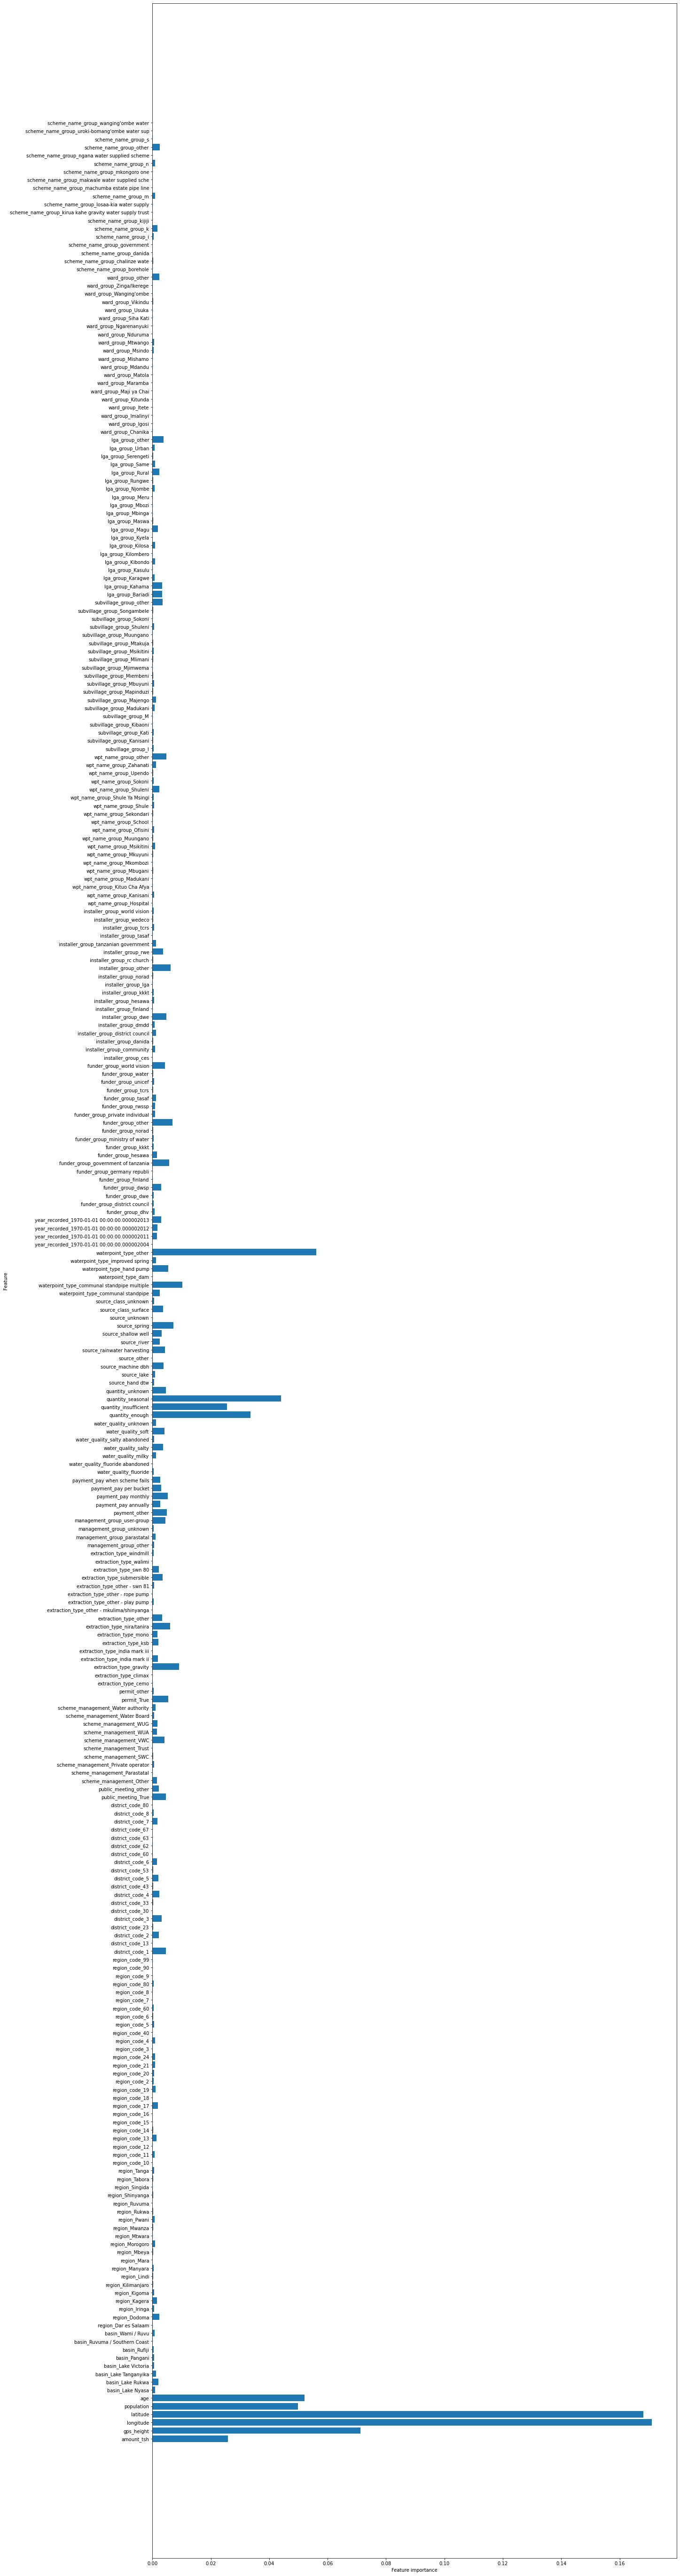

In [107]:
#feature importance
decision_tree_clf.feature_importances_;

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (20, 100))
    plt.barh(range(n_features), model.feature_importances_, align = 'center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_tree_clf)

#save
plt.savefig('./Data/decision_tree_clf_feature_importances')

In [108]:
#look for columns with 'ward'
preprocessed_df.filter(like = 'ward').columns

Index(['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', 'ward_group_Wanging'ombe',
       'ward_group_Zinga/Ikerege', 'ward_group_other'],
      dtype='object')

In [109]:
#look for columns with 'subvillage'
preprocessed_df.filter(like = 'subvillage').columns

Index(['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'],
      dtype='object')

In [110]:
#look for columns with 'wpt_name'
preprocessed_df.filter(like = 'wpt_name').columns

Index(['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'],
      dtype='object')

In [111]:
#drop features
X.drop(columns = ['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', "ward_group_Wanging'ombe",
       'ward_group_Zinga/Ikerege', 'ward_group_other'], axis = 1, inplace = True)

In [112]:
#drop features
X.drop(columns = ['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'], axis = 1, inplace = True)

In [113]:
#drop features
X.drop(columns = ['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'], axis = 1, inplace = True)

In [114]:
#re-perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [115]:
#re-scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

In [116]:
#instantiate trimmed model
decision_tree_clf = DecisionTreeClassifier(random_state = 21)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 99.7138047138047
#Test accuracy: 75.97643097643098

Train accuracy: 99.7138047138047
Test accuracy: 75.97643097643098


In [117]:
#set param grid
decision_tree_param_grid = {'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [5, 8, 10],
                            'min_samples_leaf' : [3, 4, 5],
                            'max_depth': [40, 80],
                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
decision_tree_gridsearch = GridSearchCV(estimator = decision_tree_clf, 
                                        param_grid = decision_tree_param_grid,
                                        scoring = 'accuracy', 
                                        cv = 5,
                                        n_jobs = -1)

#fit
decision_tree_gridsearch.fit(X_train, y_train)

#best param
decision_tree_gridsearch.best_params_

#'criterion': 'entropy',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 4,
#'min_samples_split': 5

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [118]:
#train a classifier with optimal values identified above
decision_tree_clf = DecisionTreeClassifier(random_state = 21, 
                                           criterion = 'entropy',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 4,
                                           min_samples_split = 5)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 79.15193602693603
#Test accuracy: 73.94781144781145

Train accuracy: 79.15193602693603
Test accuracy: 73.94781144781145


In [119]:
#train cross validation
decision_tree_train_cv_score = cross_val_score(decision_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_train_cv_score)

#test cross validation
decision_tree_test_cv_score = cross_val_score(decision_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_test_cv_score)

Train cross validation: 0.7383627946127946
Train cross validation: 0.6974747474747475


In [120]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2813131313131313
Mean Squared Error: 0.3228956228956229
Root Mean Squared Error: 0.5682390543561952


In [121]:
#classification report
decision_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', decision_tree_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      4614
           1       0.75      0.83      0.79      6434
           2       0.48      0.23      0.31       832

    accuracy                           0.74     11880
   macro avg       0.66      0.59      0.61     11880
weighted avg       0.73      0.74      0.73     11880



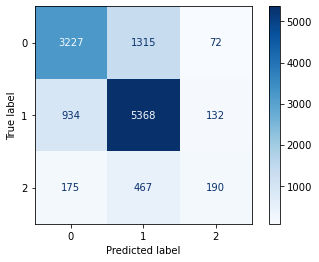

In [122]:
#plot confusion matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [123]:
#function bias() to calculate the bias of a model's predictions given the actual data
def bias(y, y_hat):
    return np.mean(y_hat - y)

#function variance() to calculate the variance of a model's predictions
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

-0.013468013468013467
0.2880448423630242


In [124]:
#summary table
summary_table_1 = pd.DataFrame({'Model': [],
                              'Accuracy': [], 'CV': [], 
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'MAE': [], 'MSE': [], 'RMSE': [],
                              'AUC': [], 'Bias': [], 'Variance': []
                              })

summary_table_1.loc[0] = ['Imbalance Decision Tree',
                        round(decision_tree_test_accuracy, 2), round(decision_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.7,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045


# Logistic Regression

In [127]:
#instantiate baseline model
logreg_clf = LogisticRegression(random_state = 21)

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 75.17466329966331
#Test accuracy: 74.81481481481481

Train accuracy: 75.17466329966331
Test accuracy: 74.81481481481481


In [128]:
#set param grid
logreg_param_grid = {'fit_intercept': [True, False],
                     'C': [5000000, 1e12],
                     'solver' : ['sag', 'saga', 'liblinear'],
                     'multi_class': ['multinomial', 'auto']}

#gridsearch
logreg_gridsearch = GridSearchCV(estimator = logreg_clf,
                                 param_grid = logreg_param_grid,
                                 scoring = 'accuracy', cv = 5,
                                 n_jobs = -1)

#fit
logreg_gridsearch.fit(X_train, y_train)

#best param
logreg_gridsearch.best_params_

#'C': 5000000,
#'fit_intercept': True,
#'multi_class': 'multinomial',
#'solver': 'saga'

{'C': 5000000,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'saga'}

In [130]:
#train a classifier with optimal values identified above
logreg_clf = LogisticRegression(random_state = 21,
                                fit_intercept = True, 
                                C = 5000000,
                                multi_class = 'multinomial', 
                                solver = 'saga')

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 75.21885521885523
#Test accuracy: 74.86531986531986

Train accuracy: 75.21885521885523
Test accuracy: 74.86531986531986


In [131]:
#train cross validation
logreg_train_cv_score = cross_val_score(logreg_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', logreg_train_cv_score)

#test cross validation
logreg_test_cv_score = cross_val_score(logreg_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', logreg_test_cv_score)

Train cross validation: 0.7493265993265993
Test cross validation: 0.7442760942760943


In [132]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.26826599326599326
Mean Squared Error: 0.3021043771043771
Root Mean Squared Error: 0.5496402251513048


In [133]:
#classification report
logreg_classification_report = classification_report(y_test, y_hat_test)
print('Model: Logistic Regression', '\n', logreg_classification_report)

Model: Logistic Regression 
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      4614
           1       0.73      0.89      0.80      6434
           2       0.50      0.13      0.21       832

    accuracy                           0.75     11880
   macro avg       0.68      0.56      0.58     11880
weighted avg       0.74      0.75      0.73     11880



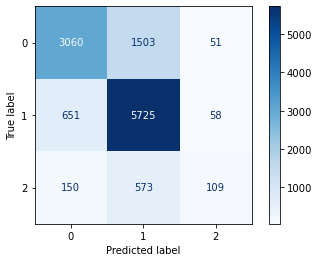

In [134]:
#plot confusion matrix
plot_confusion_matrix(logreg_clf, X_test, y_test, cmap = plt.cm.Blues)

AUC: 0.8202594099871888


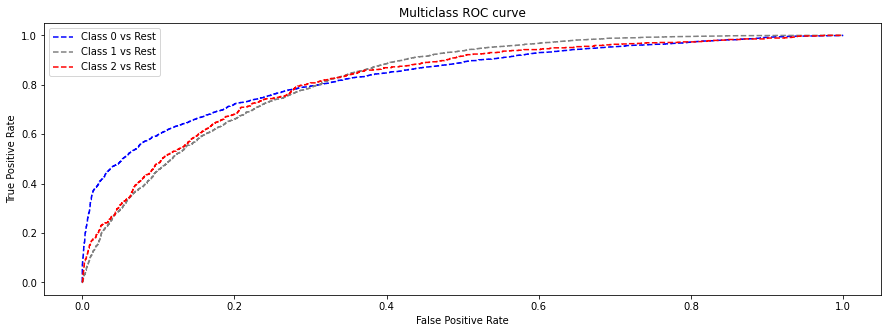

In [135]:
#get AUC
logreg_y_score = logreg_clf.fit(X_train, y_train).decision_function(X_test)

#roc curve for classes
logreg_fpr = {}
logreg_tpr = {}
logreg_thresh = {}

n_class = 3

for i in range(n_class):    
    logreg_fpr[i], logreg_tpr[i], logreg_thresh[i] = roc_curve(y_test, logreg_y_score[:, i], pos_label = i)

# plotting
plt.figure(figsize = (15, 5))
plt.plot(logreg_fpr[0], logreg_tpr[0], linestyle = '--',color = 'blue', label = 'Class 0 vs Rest')
plt.plot(logreg_fpr[1], logreg_tpr[1], linestyle = '--',color = 'gray', label = 'Class 1 vs Rest')
plt.plot(logreg_fpr[2], logreg_tpr[2], linestyle = '--',color = 'red', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

plt.savefig('./Data/logreg_roc')

#get AUC
print('AUC:', auc(logreg_fpr[i], logreg_tpr[i]))

In [136]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0117003367003367
0.24931604909929822


In [137]:
#summary table
summary_table_1.loc[1] = ['Imbalance Logistic Regression',
                        round(logreg_test_accuracy, 2), round(logreg_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        round(auc(logreg_fpr[i], logreg_tpr[i]), 2), bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316


# K-Nearest Neighbor

In [138]:
#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 83.57954545454545
#Test accuracy: 77.86195286195287

Train accuracy: 83.57954545454545
Test accuracy: 77.86195286195287


In [139]:
#set param grid
knn_param_grid = {"n_neighbors" : [3, 5, 7, 10],
                  'weights' : ['uniform', 'distance']}

#gridsearch
knn_gridsearch = GridSearchCV(estimator = knn_clf,
                             param_grid = knn_param_grid,
                             scoring = 'accuracy', cv = 5,
                             n_jobs = -1)

#fit
knn_gridsearch.fit(X_train, y_train)

#best param
knn_gridsearch.best_params_

#'n_neighbors': 10, 
#'weights': 'distance'

{'n_neighbors': 10, 'weights': 'distance'}

In [140]:
#train a classifier with optimal values identified above
knn_clf = KNeighborsClassifier(n_neighbors = 10, 
                               weights = 'distance')

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 99.71170033670033
#Test accuracy: 78.95622895622895

Train accuracy: 99.71170033670033
Test accuracy: 78.95622895622895


In [141]:
#train cross validation
knn_train_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', knn_train_cv_score)

#test cross validation
knn_test_cv_score = cross_val_score(knn_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', knn_test_cv_score)

Train cross validation: 0.7739478114478114
Test cross validation: 0.7346801346801346


In [142]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.231986531986532
Mean Squared Error: 0.2750841750841751
Root Mean Squared Error: 0.5244846757381717


In [143]:
#classification report
knn_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', knn_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      4614
           1       0.80      0.87      0.83      6434
           2       0.50      0.36      0.42       832

    accuracy                           0.79     11880
   macro avg       0.70      0.66      0.68     11880
weighted avg       0.78      0.79      0.78     11880



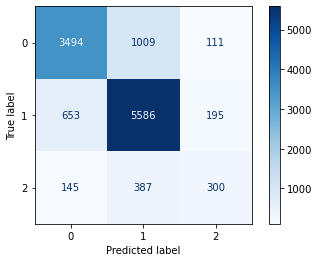

In [144]:
#plot
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [145]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.00808080808080808
0.3160224863676042


In [146]:
#summary table
summary_table_1.loc[2] = ['Imbalance KNN',
                        round(knn_test_accuracy, 2), round(knn_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022


# Bagged Tree

In [148]:
#instantiate
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21),
                                    random_state = 21)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 83.1628787878788
#Test accuracy: 79.15824915824916

Train accuracy: 83.1628787878788
Test accuracy: 79.15824915824916


In [149]:
#param
bagged_tree_param_grid = {'n_estimators' : [20, 50, 100],
                          'max_samples': [10, 20, 50],
                          'max_features': [10, 20, 50]}

#gridsearch
bagged_tree_gridsearch = GridSearchCV(estimator = bagged_tree_clf, 
                                        param_grid = bagged_tree_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
bagged_tree_gridsearch.fit(X_train, y_train)

#best param
bagged_tree_gridsearch.best_params_

#'bootstrap': False,
#'bootstrap_features': True,
#'max_features': 50,
#'max_samples': 50,
#'n_estimators': 100

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 50,
 'max_samples': 50,
 'n_estimators': 100}

In [151]:
#train a classifier with optimal values identified above
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21,
                                                           criterion = 'entropy',
                                                           max_depth = 40,
                                                           max_features = 'auto',
                                                           min_samples_leaf = 4,
                                                           min_samples_split = 5),
                                    random_state = 21,
                                    max_features = 50,
                                    max_samples = 50,
                                    n_estimators = 100)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 57.16961279461279
#Test accuracy: 57.03703703703704

Train accuracy: 57.16961279461279
Test accuracy: 57.03703703703704


In [152]:
#train cross validation
bagged_tree_train_cv_score = cross_val_score(bagged_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', bagged_tree_train_cv_score)

#test cross validation
bagged_tree_test_cv_score = cross_val_score(bagged_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', bagged_tree_test_cv_score)

Test cross validation: 0.562226430976431
Train cross validation: 0.5843434343434344


In [153]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4297979797979798
Mean Squared Error: 0.43013468013468015
Root Mean Squared Error: 0.6558465370303331


In [154]:
#classification report
bagged_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: Bagged Tree', '\n', bagged_tree_classification_report)

Model: Bagged Tree 
               precision    recall  f1-score   support

           0       0.93      0.08      0.15      4614
           1       0.56      1.00      0.72      6434
           2       0.00      0.00      0.00       832

    accuracy                           0.57     11880
   macro avg       0.50      0.36      0.29     11880
weighted avg       0.66      0.57      0.44     11880



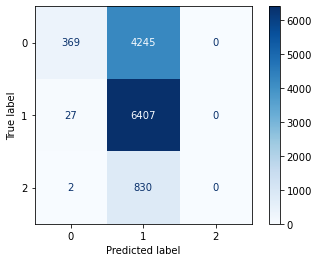

In [155]:
#plot confusion matrix
plot_confusion_matrix(bagged_tree_clf, X_test, y_test, cmap = plt.cm.Blues)

In [156]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.28484848484848485
0.03237932070423655


In [157]:
#summary table
summary_table_1.loc[3] = ['Imbalance Bagged Tree',
                        round(bagged_tree_test_accuracy, 2), round(bagged_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022
3,Imbalance Bagged Tree,57.04,0.58,0.50,0.36,0.29,0.43,0.43,0.66,-,0.284848,0.032379


# Random Forest

In [158]:
#instantiate
random_forest_clf = RandomForestClassifier(random_state = 21)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 99.70959595959596
#Test accuracy: 80.25252525252526

Train accuracy: 99.70959595959596
Test accuracy: 80.25252525252526


In [159]:
#set param grid
random_forest_param_grid = {'n_estimators' : [20, 50, 100],
                            'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [8, 10, 12],
                            'min_samples_leaf' : [3, 4, 5],
                            'max_depth': [40, 80, 90, 100],
                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
random_forest_gridsearch = GridSearchCV(estimator = random_forest_clf, 
                                        param_grid = random_forest_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
random_forest_gridsearch.fit(X_train, y_train)

#best param
random_forest_gridsearch.best_params_

#'criterion': 'entropy',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 3,
#'min_samples_split': 8,
#'n_estimators': 100

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [160]:
#train a classifier with optimal values identified above
random_forest_clf = RandomForestClassifier(random_state = 21, 
                                           criterion = 'entropy',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 3,
                                           min_samples_split = 8,
                                           n_estimators = 100)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 85.32407407407408
#Test accuracy: 80.36195286195286

Train accuracy: 85.32407407407408
Test accuracy: 80.36195286195286


In [161]:
#train cross validation
random_forest_train_cv_score = cross_val_score(random_forest_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', random_forest_train_cv_score)

#test cross validation
random_forest_test_cv_score = cross_val_score(random_forest_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', random_forest_test_cv_score)

Train cross validation: 0.7952020202020201
Test cross validation: 0.7677609427609429


In [162]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2117845117845118
Mean Squared Error: 0.24259259259259258
Root Mean Squared Error: 0.4925368946511445


In [163]:
#classification report
random_forest_classification_report = classification_report(y_test, y_hat_test)
print('Model: Random Forest', '\n', random_forest_classification_report)

Model: Random Forest 
               precision    recall  f1-score   support

           0       0.85      0.75      0.79      4614
           1       0.79      0.92      0.85      6434
           2       0.68      0.23      0.35       832

    accuracy                           0.80     11880
   macro avg       0.77      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



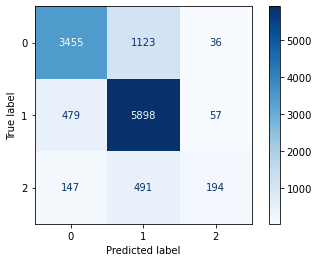

In [164]:
#plot confusion matrix
plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap = plt.cm.Blues)

In [165]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

-0.00101010101010101
0.26568578603090387


In [166]:
#summary table
summary_table_1.loc[4] = ['Imbalance Random Forest',
                        round(random_forest_test_accuracy, 2), round(random_forest_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022
3,Imbalance Bagged Tree,57.04,0.58,0.50,0.36,0.29,0.43,0.43,0.66,-,0.284848,0.032379
4,Imbalance Random Forest,80.36,0.77,0.77,0.63,0.66,0.21,0.24,0.49,-,-0.001010,0.265686


# Gradient Boosting

In [167]:
#instantiate
gradient_boost_clf = GradientBoostingClassifier(random_state = 21)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

#Train accuracy: 99.7138047138047
#Test accuracy: 80.08417508417509

Train accuracy: 99.7138047138047
Test accuracy: 80.08417508417509


In [168]:
#set param grid
gradient_boost_param_grid = {'learning_rate': [0.01, 0.025, 0.05],
                             'subsample': [0.5, 0.8, 1.0]}

#gridsearch
gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
                                         param_grid = gradient_boost_param_grid, 
                                         scoring = 'accuracy',
                                         n_jobs = -1,
                                         cv = 5)

#fit
gradient_boost_gridsearch.fit(X_train, y_train)

#best param
gradient_boost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'subsample': 0.5

{'learning_rate': 0.05, 'subsample': 0.5}

In [169]:
#train a classifier with optimal values identified above
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 4,
                                                min_samples_split = 8,
                                                learning_rate = 0.05,
                                                subsample = 0.5)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 99.34343434343434
Test accuracy: 81.1952861952862


In [170]:
#train cross validation
gradient_boost_train_cv_score = cross_val_score(gradient_boost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_train_cv_score)

#test cross validation
gradient_boost_test_cv_score = cross_val_score(gradient_boost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_test_cv_score)

Train cross validation: 0.8046717171717171
Train cross validation: 0.7781986531986533


In [171]:
#evaluate
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2048821548821549
Mean Squared Error: 0.23855218855218854
Root Mean Squared Error: 0.48841804691492363


In [172]:
#classification report
gradient_boost_classification_report = classification_report(y_test, y_hat_test)
print('Model: Gradient Boosting', '\n', gradient_boost_classification_report)

Model: Gradient Boosting 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      4614
           1       0.81      0.89      0.85      6434
           2       0.53      0.34      0.42       832

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.81      0.81      0.81     11880



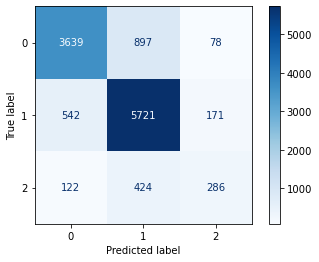

In [173]:
#plot confusion matrix
plot_confusion_matrix(gradient_boost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [174]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0011784511784511784
0.3066411590654015


In [175]:
#summary table
summary_table_1.loc[5] = ['Imbalance Gradient Boost',
                        round(gradient_boost_test_accuracy, 2), round(gradient_boost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022
3,Imbalance Bagged Tree,57.04,0.58,0.50,0.36,0.29,0.43,0.43,0.66,-,0.284848,0.032379
4,Imbalance Random Forest,80.36,0.77,0.77,0.63,0.66,0.21,0.24,0.49,-,-0.001010,0.265686


# AdaBoost

In [176]:
#instantiate baseline model
adaboost_clf = AdaBoostClassifier(random_state = 21)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0} '.format(adaboost_train_accuracy))

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0} '.format(adaboost_test_accuracy))

Train accuracy: 72.01599326599326 
Test accuracy: 71.7929292929293 


In [177]:
#param
adaboost_param_grid = {'learning_rate': [0.01, 0.025, 0.05],
                       'n_estimators' : [20, 50, 100]}

#gridsearch
adaboost_gridsearch = GridSearchCV(estimator = adaboost_clf,
                                   param_grid = adaboost_param_grid,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   cv = 5)

#fit
adaboost_gridsearch.fit(X_train, y_train)

#best param
adaboost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'n_estimators': 100

{'learning_rate': 0.05, 'n_estimators': 100}

In [178]:
#train a classifier with optimal values identified above
adaboost_clf = AdaBoostClassifier(random_state = 21,
                                  learning_rate = 0.05,
                                  n_estimators = 100)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', adaboost_train_accuracy)

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', adaboost_test_accuracy)

Train accuracy: 65.13468013468014
Test accuracy: 64.99158249158249


In [179]:
#train cross validation
adaboost_train_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', adaboost_train_cv_score)

#test cross validation
adaboost_test_cv_score = cross_val_score(adaboost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', adaboost_test_cv_score)

Train cross validation: 0.6528409090909091
Test cross validation: 0.647895622895623


In [180]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.35723905723905724
Mean Squared Error: 0.3715488215488216
Root Mean Squared Error: 0.6095480469567773


In [181]:
#classification report
adaboost_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', adaboost_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.77      0.37      0.50      4614
           1       0.62      0.93      0.75      6434
           2       0.00      0.00      0.00       832

    accuracy                           0.65     11880
   macro avg       0.46      0.44      0.42     11880
weighted avg       0.63      0.65      0.60     11880



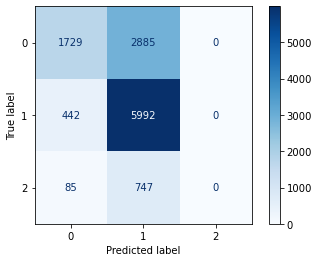

In [182]:
#plot confusion matrix
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [183]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.12845117845117845
0.1538373635343332


In [184]:
#summary table
summary_table_1.loc[6] = ['Imbalance ADABoost',
                        round(adaboost_test_accuracy, 2), round(adaboost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022
3,Imbalance Bagged Tree,57.04,0.58,0.50,0.36,0.29,0.43,0.43,0.66,-,0.284848,0.032379
4,Imbalance Random Forest,80.36,0.77,0.77,0.63,0.66,0.21,0.24,0.49,-,-0.001010,0.265686


# XGBoost

In [185]:
#instantiate baseline model
xgb_clf = xgb.XGBClassifier(random_state = 21)

#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 83.89941077441078
#Test accuracy: 80.1936026936027

Train accuracy: 83.89941077441078
Test accuracy: 80.1936026936027


In [186]:
#set param grid
xgb_param_grid = {'booster' : ['gbtree', 'gblinear'],
                  'min_child_weight' : [1, 3, 5]}

#gridsearch
xgb_gridsearch = GridSearchCV(estimator = xgb_clf, 
                                        param_grid = xgb_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
xgb_gridsearch.fit(X_train, y_train)

#best param
xgb_gridsearch.best_params_

#'booster': 'gbtree', 
#'min_child_weight': 3

{'booster': 'gbtree', 'min_child_weight': 3}

In [189]:
#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21,
                            booster = 'gbtree', 
                            min_child_weight = 3)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 83.5016835016835
#Test accuracy: 80.3114478114478

Train accuracy: 83.5016835016835
Test accuracy: 80.3114478114478


In [190]:
#train cross validation
xgb_train_cv_score = cross_val_score(xgb_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', xgb_train_cv_score)

#test cross validation
xgb_test_cv_score = cross_val_score(xgb_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', xgb_test_cv_score)

Train cross validation: 0.795496632996633
Test cross validation: 0.7791245791245791


In [191]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.21102693602693604
Mean Squared Error: 0.2393097643097643
Root Mean Squared Error: 0.4891929724656358


In [192]:
#classification report
xgb_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', xgb_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      4614
           1       0.78      0.92      0.84      6434
           2       0.65      0.24      0.35       832

    accuracy                           0.80     11880
   macro avg       0.76      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



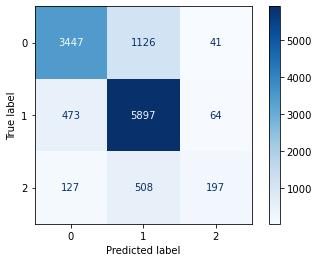

In [193]:
#plot confusion matrix
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap = plt.cm.Blues)

In [194]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0031144781144781144
0.26670390067906896


In [195]:
#summary table
summary_table_1.loc[7] = ['Imbalance XGBoost',
                        round(xgb_test_accuracy, 2), round(xgb_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Decision Tree,73.95,0.70,0.66,0.59,0.61,0.28,0.32,0.57,-,-0.013468,0.288045
1,Imbalance Logistic Regression,74.87,0.74,0.68,0.56,0.58,0.27,0.30,0.55,0.82,0.011700,0.249316
2,Imbalance KNN,78.96,0.73,0.70,0.66,0.68,0.23,0.28,0.52,-,0.008081,0.316022
3,Imbalance Bagged Tree,57.04,0.58,0.50,0.36,0.29,0.43,0.43,0.66,-,0.284848,0.032379
4,Imbalance Random Forest,80.36,0.77,0.77,0.63,0.66,0.21,0.24,0.49,-,-0.001010,0.265686


# Support Vector Machine

In [196]:
#instantiate baseline model
svm_clf = SVC(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

#Train accuracy: 79.6506734006734
#Test accuracy: 78.55218855218855

Train accuracy: 79.6506734006734
Test accuracy: 78.55218855218855


In [ ]:
#set param grid
svm_param_grid = {'C' : [3000000, 5000000, 1e12],
                  'degree': [1, 2, 3],
                  'gamma': ['scale', 'auto'],
                  'decision_function_shape': ['ovo', 'ovr']}

#gridsearch
svm_gridsearch = GridSearchCV(estimator = svm_clf,
                              param_grid = svm_param_grid,
                              scoring = 'accuracy', cv = 5,
                              n_jobs = -1)

#fit
svm_gridsearch.fit(X_train, y_train)

#best param
svm_gridsearch.best_params_

In [ ]:
#train a classifier with optimal values identified above
svm_clf = svm.XGBClassifier(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

In [ ]:
#train cross validation
svm_train_cv_score = cross_val_score(svm_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', svm_train_cv_score)

#test cross validation
svm_test_cv_score = cross_val_score(svm_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', svm_test_cv_score)

In [ ]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

In [ ]:
#classification report
svm_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', svm_classification_report)

In [ ]:
#plot confusion matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = plt.cm.Blues)

In [ ]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

In [ ]:
#summary table
summary_table_1.loc[8] = ['Imbalance SVM',
                        round(svm_test_accuracy, 2), round(svm_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table_1.head(10)

In [ ]:
#save
summary_table_1.to_csv('./Data/summary_table_1')

# Models Comparison

TypeError: boxplot() got an unexpected keyword argument 's'

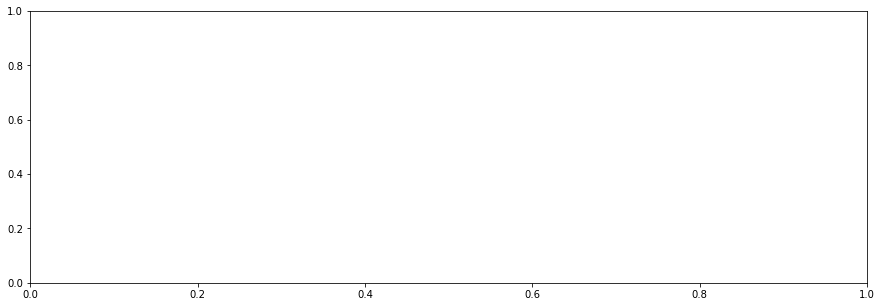

In [248]:
#plot accuracy
plt.figure(figsize = (15, 5))
sns.boxplot(x = summary_table['Accuracy'], y = summary_table['Model'], s = 100, marker = 'o')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title("Accuracy Comparison")

plt.savefig('./Data/models_comparison')

# Submission Dataframe

In [ ]:
prediction = clf.predict(test_values[features])
prediction_df = pd.DataFrame(prediction, columns=["status_group"])
submission = pd.merge(test_values.id.reset_index()["id"].to_frame(), prediction_df, right_index = True, left_index = True)
submission.head()
submission.to_csv("sub.csv", index = False)